In [982]:
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point
from shapely.geometry import Polygon
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
% matplotlib inline

In [983]:
df = pd.read_excel('2015_2016_EMS_SQR_Results_2016_11_15.xlsx',sheetname='Summary')
df

,DBN,School Name,latitude,longitude,School Type,Enrollment,Rigorous Instruction Rating,Collaborative Teachers Rating,Supportive Environment Rating,Effective School Leadership Rating,...,Percent HRA Eligible,Percent Asian,Percent Black,Percent Hispanic,Percent White,Years of principal experience at this school,Percent of teachers with 3 or more years of experience,Student Attendance Rate,Percent of Students Chronically Absent,Teacher Attendance Rate
0,01M015,P.S. 015 Roberto Clemente,40.721697,-73.978560,Elementary,162,Exceeding Target,Exceeding Target,Meeting Target,Exceeding Target,...,0.722,0.056,0.309,0.605,0.012,5.8,0.591,0.934,0.241,0.977
1,01M019,P.S. 019 Asher Levy,40.729928,-73.984393,Elementary,249,NaN,NaN,NaN,Exceeding Target,...,0.438,0.104,0.197,0.627,0.064,6.8,0.795,0.915,0.324,0.956
2,01M020,P.S. 020 Anna Silver,40.721260,-73.986336,Elementary,535,Meeting Target,Meeting Target,Meeting Target,Not Meeting Target,...,0.535,0.359,0.084,0.488,0.043,1.9,0.739,0.942,0.204,0.959
3,01M034,P.S. 034 Franklin D. Roosevelt,40.726397,-73.975197,K-8,376,Approaching Target,Approaching Target,Approaching Target,Meeting Target,...,0.707,0.043,0.279,0.644,0.035,3.6,0.861,0.916,0.288,0.967
4,01M063,The STAR Academy - P.S.63,40.724404,-73.986360,Elementary,188,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,...,0.537,0.048,0.191,0.644,0.106,8.9,0.524,0.938,0.168,0.984
5,01M064,P.S. 064 Robert Simon,40.724025,-73.981653,Elementary,238,Meeting Target,Exceeding Target,Meeting Target,Meeting Target,...,0.643,0.067,0.185,0.664,0.071,7.8,0.621,0.914,0.345,0.979
6,01M110,P.S. 110 Florence Nightingale,40.715250,-73.979994,Elementary,365,Exceeding Target,Exceeding Target,Exceeding Target,Meeting Target,...,0.326,0.159,0.093,0.449,0.255,8.0,0.750,0.955,0.106,0.977
7,01M134,P.S. 134 Henrietta Szold,40.714301,-73.982966,Elementary,248,Meeting Target,Meeting Target,Meeting Target,Meeting Target,...,0.665,0.210,0.202,0.556,0.028,2.9,0.679,0.920,0.309,0.957
8,01M137,P.S. 137 John L. Bernstein,40.714406,-73.983291,Elementary,145,NaN,NaN,NaN,NaN,...,0.690,0.110,0.241,0.621,0.028,1.0,0.667,0.913,0.336,0.972
9,01M140,P.S. 140 Nathan Straus,40.719114,-73.983602,K-8,363,Meeting Target,Meeting Target,Meeting Target,Meeting Target,...,0.727,0.052,0.124,0.777,0.036,1.0,0.781,0.929,0.287,0.969


In [984]:
df['School Type'].value_counts()

Elementary    655
Middle        391
K-8           202
Name: School Type, dtype: int64

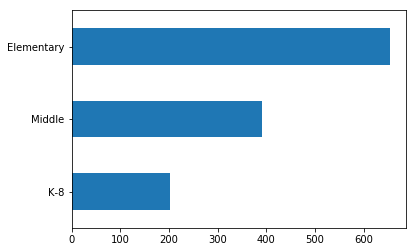

In [1087]:
df['School Type'].value_counts().sort_values().plot(kind="barh")
plt.savefig('Type.pdf')

In [986]:
def make_point(row):
    return Point(row.longitude, row.latitude)
points = df.apply(make_point, axis=1)
df = gpd.GeoDataFrame(df, geometry=points)
df.crs = {'init': 'epsg:4326'}
df.head()

,DBN,School Name,latitude,longitude,School Type,Enrollment,Rigorous Instruction Rating,Collaborative Teachers Rating,Supportive Environment Rating,Effective School Leadership Rating,...,Percent Asian,Percent Black,Percent Hispanic,Percent White,Years of principal experience at this school,Percent of teachers with 3 or more years of experience,Student Attendance Rate,Percent of Students Chronically Absent,Teacher Attendance Rate,geometry
0,01M015,P.S. 015 Roberto Clemente,40.721697,-73.978560,Elementary,162,Exceeding Target,Exceeding Target,Meeting Target,Exceeding Target,...,0.056,0.309,0.605,0.012,5.8,0.591,0.934,0.241,0.977,POINT (-73.97856 40.721697)
1,01M019,P.S. 019 Asher Levy,40.729928,-73.984393,Elementary,249,NaN,NaN,NaN,Exceeding Target,...,0.104,0.197,0.627,0.064,6.8,0.795,0.915,0.324,0.956,POINT (-73.984393 40.729928)
2,01M020,P.S. 020 Anna Silver,40.721260,-73.986336,Elementary,535,Meeting Target,Meeting Target,Meeting Target,Not Meeting Target,...,0.359,0.084,0.488,0.043,1.9,0.739,0.942,0.204,0.959,POINT (-73.98633599999999 40.72126)
3,01M034,P.S. 034 Franklin D. Roosevelt,40.726397,-73.975197,K-8,376,Approaching Target,Approaching Target,Approaching Target,Meeting Target,...,0.043,0.279,0.644,0.035,3.6,0.861,0.916,0.288,0.967,POINT (-73.97519699999999 40.726397)
4,01M063,The STAR Academy - P.S.63,40.724404,-73.986360,Elementary,188,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,...,0.048,0.191,0.644,0.106,8.9,0.524,0.938,0.168,0.984,POINT (-73.98636 40.724404)


In [987]:
neighborhoods = gpd.read_file("nynta_14d/nynta.shp")

In [988]:
df.crs

{'init': 'epsg:4326'}

In [989]:
neighborhoods.to_crs(df.crs, inplace=True)

In [990]:
neighborhoods.crs

{'init': 'epsg:4326'}

In [991]:
neighborhoods_df = gpd.sjoin(df, neighborhoods, how='left', op='within')
neighborhoods_df.head()

,DBN,School Name,latitude,longitude,School Type,Enrollment,Rigorous Instruction Rating,Collaborative Teachers Rating,Supportive Environment Rating,Effective School Leadership Rating,...,Teacher Attendance Rate,geometry,index_right,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Area,Shape_Leng
0,01M015,P.S. 015 Roberto Clemente,40.721697,-73.978560,Elementary,162,Exceeding Target,Exceeding Target,Meeting Target,Exceeding Target,...,0.977,POINT (-73.97856 40.721697),71,1.0,Manhattan,061,MN28,Lower East Side,2.329762e+07,25469.235630
1,01M019,P.S. 019 Asher Levy,40.729928,-73.984393,Elementary,249,NaN,NaN,NaN,Exceeding Target,...,0.956,POINT (-73.984393 40.729928),52,1.0,Manhattan,061,MN22,East Village,1.089549e+07,13539.197632
2,01M020,P.S. 020 Anna Silver,40.721260,-73.986336,Elementary,535,Meeting Target,Meeting Target,Meeting Target,Not Meeting Target,...,0.959,POINT (-73.98633599999999 40.72126),53,1.0,Manhattan,061,MN27,Chinatown,1.450195e+07,20788.888972
3,01M034,P.S. 034 Franklin D. Roosevelt,40.726397,-73.975197,K-8,376,Approaching Target,Approaching Target,Approaching Target,Meeting Target,...,0.967,POINT (-73.97519699999999 40.726397),71,1.0,Manhattan,061,MN28,Lower East Side,2.329762e+07,25469.235630
4,01M063,The STAR Academy - P.S.63,40.724404,-73.986360,Elementary,188,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,...,0.984,POINT (-73.98636 40.724404),52,1.0,Manhattan,061,MN22,East Village,1.089549e+07,13539.197632


In [992]:
neighborhoods_df[neighborhoods_df['NTAName'] == 'East Village']

,DBN,School Name,latitude,longitude,School Type,Enrollment,Rigorous Instruction Rating,Collaborative Teachers Rating,Supportive Environment Rating,Effective School Leadership Rating,...,Teacher Attendance Rate,geometry,index_right,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Area,Shape_Leng
1,01M019,P.S. 019 Asher Levy,40.729928,-73.984393,Elementary,249,NaN,NaN,NaN,Exceeding Target,...,0.956,POINT (-73.984393 40.729928),52,1.0,Manhattan,061,MN22,East Village,1.089549e+07,13539.197632
4,01M063,The STAR Academy - P.S.63,40.724404,-73.986360,Elementary,188,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,...,0.984,POINT (-73.98636 40.724404),52,1.0,Manhattan,061,MN22,East Village,1.089549e+07,13539.197632
14,01M301,"Technology, Arts, and Sciences Studio",40.729885,-73.984346,Middle,156,Approaching Target,Meeting Target,Approaching Target,Meeting Target,...,0.959,POINT (-73.984346 40.729885),52,1.0,Manhattan,061,MN22,East Village,1.089549e+07,13539.197632
19,01M363,Neighborhood School,40.724404,-73.986360,Elementary,297,Meeting Target,Meeting Target,Exceeding Target,Meeting Target,...,0.968,POINT (-73.98636 40.724404),52,1.0,Manhattan,061,MN22,East Village,1.089549e+07,13539.197632
22,01M450,East Side Community School,40.729382,-73.982502,Middle,291,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,...,0.975,POINT (-73.982502 40.729382),52,1.0,Manhattan,061,MN22,East Village,1.089549e+07,13539.197632


In [993]:
neighborhoods_df['NTAName'].value_counts().sort_values(ascending=False)

Stuyvesant Heights                                 26
Brownsville                                        25
Central Harlem North-Polo Grounds                  23
Lower East Side                                    22
Mott Haven-Port Morris                             22
East New York                                      22
East Harlem South                                  21
Crown Heights North                                20
East Concourse-Concourse Village                   19
Upper West Side                                    19
Claremont-Bathgate                                 17
Central Harlem South                               16
East Tremont                                       16
Bushwick South                                     15
East Harlem North                                  15
Washington Heights South                           14
Bedford                                            13
Soundview-Castle Hill-Clason Point-Harding Park    13
Ocean Hill                  

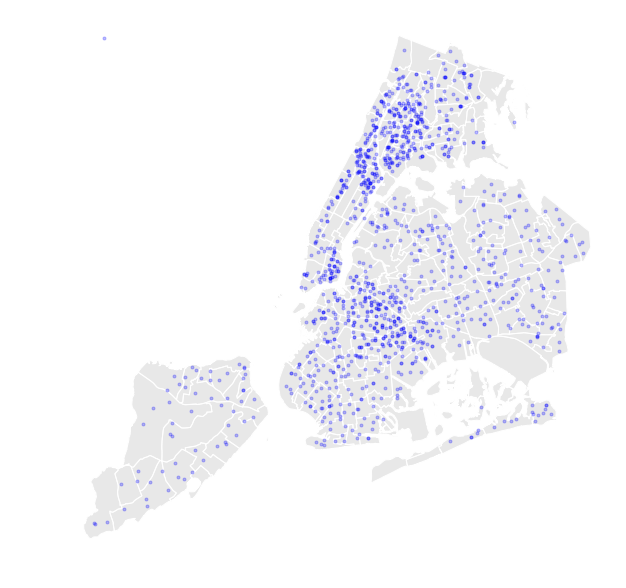

In [996]:
ax = neighborhoods.to_crs({'proj': 'merc'}).plot(color='lightgrey', edgecolor='white', figsize=(10,15))
df.to_crs({'proj': 'merc'}).plot(ax=ax, color='blue', markersize=3, alpha=0.25)
ax.axis('off')
plt.savefig('school_1.pdf')

In [1074]:
from geopandas import GeoDataFrame
neighborhoods_df = GeoDataFrame(neighborhoods_df)

In [1075]:
neighborhoods_df.to_file("school.json", driver='GeoJSON')

In [997]:
neighborhoods.reset_index().head()

,index,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Area,Shape_Leng,geometry
0,0,3,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,POLYGON ((-73.94732672160579 40.62916656720946...
1,1,3,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,POLYGON ((-73.94193078816194 40.70072523469547...
2,2,2,Bronx,005,BX40,Fordham South,6.307284e+06,15878.272921,POLYGON ((-73.89138023380261 40.86170058826306...
3,3,3,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227722,POLYGON ((-73.97604935591414 40.63127590564665...
4,4,3,Brooklyn,047,BK96,Rugby-Remsen Village,3.270695e+07,30957.853395,POLYGON ((-73.90855790522767 40.65209593779451...


In [998]:
neighborhoods_with_df = gpd.sjoin(neighborhoods.reset_index(), df, how='inner', op='intersects')
neighborhoods_with_df.head()

,index,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Area,Shape_Leng,geometry,index_right,...,Percent HRA Eligible,Percent Asian,Percent Black,Percent Hispanic,Percent White,Years of principal experience at this school,Percent of teachers with 3 or more years of experience,Student Attendance Rate,Percent of Students Chronically Absent,Teacher Attendance Rate
0,0,3,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,POLYGON ((-73.94732672160579 40.62916656720946...,731,...,0.463,0.097,0.111,0.168,0.601,11.0,0.740,0.945,0.134,0.960
0,0,3,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,POLYGON ((-73.94732672160579 40.62916656720946...,750,...,0.452,0.058,0.610,0.184,0.135,16.8,0.760,0.953,0.129,0.965
0,0,3,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,POLYGON ((-73.94732672160579 40.62916656720946...,704,...,0.576,0.209,0.047,0.260,0.482,8.8,0.688,0.940,0.200,0.962
0,0,3,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,POLYGON ((-73.94732672160579 40.62916656720946...,728,...,0.401,0.172,0.470,0.139,0.177,2.9,0.833,0.948,0.149,0.964
0,0,3,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,POLYGON ((-73.94732672160579 40.62916656720946...,740,...,0.477,0.185,0.626,0.116,0.065,2.0,0.895,0.949,0.140,0.969


In [999]:
neighborhoods_with_df.groupby('NTAName').size().head()

NTAName
Allerton-Pelham Gardens                       5
Annadale-Huguenot-Prince's Bay-Eltingville    6
Arden Heights                                 2
Astoria                                       6
Auburndale                                    2
dtype: int64

In [1000]:
neighborhoods.head()

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Area,Shape_Leng,geometry
0,3,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,POLYGON ((-73.94732672160579 40.62916656720946...
1,3,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,POLYGON ((-73.94193078816194 40.70072523469547...
2,2,Bronx,005,BX40,Fordham South,6.307284e+06,15878.272921,POLYGON ((-73.89138023380261 40.86170058826306...
3,3,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227722,POLYGON ((-73.97604935591414 40.63127590564665...
4,3,Brooklyn,047,BK96,Rugby-Remsen Village,3.270695e+07,30957.853395,POLYGON ((-73.90855790522767 40.65209593779451...


In [1001]:
neighborhoods_with_df.head()

,index,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Area,Shape_Leng,geometry,index_right,...,Percent HRA Eligible,Percent Asian,Percent Black,Percent Hispanic,Percent White,Years of principal experience at this school,Percent of teachers with 3 or more years of experience,Student Attendance Rate,Percent of Students Chronically Absent,Teacher Attendance Rate
0,0,3,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,POLYGON ((-73.94732672160579 40.62916656720946...,731,...,0.463,0.097,0.111,0.168,0.601,11.0,0.740,0.945,0.134,0.960
0,0,3,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,POLYGON ((-73.94732672160579 40.62916656720946...,750,...,0.452,0.058,0.610,0.184,0.135,16.8,0.760,0.953,0.129,0.965
0,0,3,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,POLYGON ((-73.94732672160579 40.62916656720946...,704,...,0.576,0.209,0.047,0.260,0.482,8.8,0.688,0.940,0.200,0.962
0,0,3,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,POLYGON ((-73.94732672160579 40.62916656720946...,728,...,0.401,0.172,0.470,0.139,0.177,2.9,0.833,0.948,0.149,0.964
0,0,3,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,POLYGON ((-73.94732672160579 40.62916656720946...,740,...,0.477,0.185,0.626,0.116,0.065,2.0,0.895,0.949,0.140,0.969


In [1002]:
neighborhoods_with_df.groupby('index').size().head(10)

index
0     5
1    13
2    10
3    11
4    11
5     2
6     4
7     2
8     2
9     7
dtype: int64

In [1003]:
neighborhoods['df_count'] = neighborhoods_with_df.groupby('index').size()
neighborhoods.head()

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Area,Shape_Leng,geometry,df_count
0,3,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,POLYGON ((-73.94732672160579 40.62916656720946...,5.0
1,3,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,POLYGON ((-73.94193078816194 40.70072523469547...,13.0
2,2,Bronx,005,BX40,Fordham South,6.307284e+06,15878.272921,POLYGON ((-73.89138023380261 40.86170058826306...,10.0
3,3,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227722,POLYGON ((-73.97604935591414 40.63127590564665...,11.0
4,3,Brooklyn,047,BK96,Rugby-Remsen Village,3.270695e+07,30957.853395,POLYGON ((-73.90855790522767 40.65209593779451...,11.0


In [1004]:
neighborhoods['df_count'] = neighborhoods['df_count'].fillna(0)
neighborhoods.head()

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Area,Shape_Leng,geometry,df_count
0,3,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,POLYGON ((-73.94732672160579 40.62916656720946...,5.0
1,3,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,POLYGON ((-73.94193078816194 40.70072523469547...,13.0
2,2,Bronx,005,BX40,Fordham South,6.307284e+06,15878.272921,POLYGON ((-73.89138023380261 40.86170058826306...,10.0
3,3,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227722,POLYGON ((-73.97604935591414 40.63127590564665...,11.0
4,3,Brooklyn,047,BK96,Rugby-Remsen Village,3.270695e+07,30957.853395,POLYGON ((-73.90855790522767 40.65209593779451...,11.0


In [1005]:
%%time
# Spatial join the neighborhoods to the galleries
# how='inner' to get rid of any neighborhoods without galleries
# op='intersects' to allow any sort of overlap
# .reset_index() lets us have 'index' be a column later on
# group them by the index column, and count how many of each we have
# then fill in any NaNs with 0...
neighborhoods_with_df = gpd.sjoin(neighborhoods.reset_index(), df, how='inner', op='intersects')
neighborhoods['df_count'] = neighborhoods_with_df.groupby('index').size()
neighborhoods['df_count'] = neighborhoods['df_count'].fillna(0)
neighborhoods.head()

CPU times: user 354 ms, sys: 8.14 ms, total: 362 ms
Wall time: 362 ms


In [1006]:
nabe = neighborhoods.loc[135]
nabe

BoroCode                                                      1
BoroName                                              Manhattan
CountyFIPS                                                  061
NTACode                                                    MN31
NTAName                             Lenox Hill-Roosevelt Island
Shape_Area                                          2.15016e+07
Shape_Leng                                              37708.4
geometry      (POLYGON ((-73.94180032729426 40.7690469266247...
df_count                                                      7
Name: 135, dtype: object

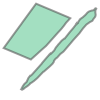

In [1007]:
nabe.geometry

In [1008]:
df.within(nabe.geometry).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [1009]:
df.within(nabe.geometry).value_counts()

False    1241
True        7
dtype: int64

In [1010]:
df.within(nabe.geometry).sum()

7

In [1011]:
df[df.within(nabe.geometry)].head()

,DBN,School Name,latitude,longitude,School Type,Enrollment,Rigorous Instruction Rating,Collaborative Teachers Rating,Supportive Environment Rating,Effective School Leadership Rating,...,Percent Asian,Percent Black,Percent Hispanic,Percent White,Years of principal experience at this school,Percent of teachers with 3 or more years of experience,Student Attendance Rate,Percent of Students Chronically Absent,Teacher Attendance Rate,geometry
48,02M158,P.S. 158 Bayard Taylor,40.770254,-73.950907,Elementary,691,Exceeding Target,Exceeding Target,Meeting Target,Meeting Target,...,0.100,0.039,0.106,0.718,1.3,0.592,0.948,0.113,0.960,POINT (-73.950907 40.770254)
49,02M167,J.H.S. 167 Robert F. Wagner,40.771886,-73.957906,Middle,1343,Exceeding Target,Exceeding Target,Meeting Target,Meeting Target,...,0.277,0.082,0.188,0.419,11.8,0.742,0.958,0.102,0.968,POINT (-73.95790599999999 40.771886)
50,02M177,Yorkville East Middle School,40.770203,-73.950730,Middle,142,Meeting Target,Exceeding Target,Exceeding Target,Exceeding Target,...,0.113,0.106,0.296,0.423,2.0,0.455,0.957,0.049,0.981,POINT (-73.95072999999999 40.770203)
51,02M183,P.S. 183 Robert L. Stevenson,40.763762,-73.957759,Elementary,555,Meeting Target,Exceeding Target,Exceeding Target,Meeting Target,...,0.169,0.040,0.105,0.661,6.0,0.763,0.958,0.063,0.968,POINT (-73.957759 40.763762)
54,02M217,P.S./I.S. 217 Roosevelt Island,40.763914,-73.948472,K-8,551,Exceeding Target,Exceeding Target,Exceeding Target,Meeting Target,...,0.289,0.163,0.147,0.354,9.8,0.571,0.953,0.103,0.970,POINT (-73.948472 40.763914)


In [1012]:
df.within(nabe.geometry).sum()

7

In [1013]:
neighborhoods.head().apply(lambda row: row.geometry, axis=1)

0    POLYGON ((-73.94732672160579 40.62916656720946...
1    POLYGON ((-73.94193078816194 40.70072523469547...
2    POLYGON ((-73.89138023380261 40.86170058826306...
3    POLYGON ((-73.97604935591414 40.63127590564665...
4    POLYGON ((-73.90855790522767 40.65209593779451...
dtype: object

In [1014]:
neighborhoods.apply(lambda row: df.within(row.geometry).sum(), axis=1)

0       5
1      13
2      10
3      11
4      11
5       2
6       4
7       2
8       2
9       7
10      5
11      2
12     25
13     10
14      4
15      4
16      6
17      2
18      6
19      1
20      3
21      8
22      3
23      4
24      9
25      4
26      3
27      5
28      4
29      0
       ..
165     7
166     8
167     6
168     1
169     2
170    10
171    10
172     0
173     3
174    16
175    11
176    13
177     0
178     4
179     2
180     8
181     6
182     1
183    10
184     8
185     5
186     2
187     4
188    14
189     7
190     6
191     9
192     0
193     5
194     0
Length: 195, dtype: int64

In [1015]:
%%time
neighborhoods['df_count'] = neighborhoods.apply(lambda row: df.within(row.geometry).sum(), axis=1)

CPU times: user 15.8 s, sys: 106 ms, total: 16 s
Wall time: 16.1 s


In [1016]:
neighborhoods.head()

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Area,Shape_Leng,geometry,df_count
0,3,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,POLYGON ((-73.94732672160579 40.62916656720946...,5
1,3,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,POLYGON ((-73.94193078816194 40.70072523469547...,13
2,2,Bronx,005,BX40,Fordham South,6.307284e+06,15878.272921,POLYGON ((-73.89138023380261 40.86170058826306...,10
3,3,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227722,POLYGON ((-73.97604935591414 40.63127590564665...,11
4,3,Brooklyn,047,BK96,Rugby-Remsen Village,3.270695e+07,30957.853395,POLYGON ((-73.90855790522767 40.65209593779451...,11


In [820]:
#df['Percent of teachers with 3 or more years of experience'].describe()

In [821]:
#df[df['Percent of teachers with 3 or more years of experience'] > df['Percent of teachers with 3 or more years of experience'].quantile(0.75)]['School Type'].value_counts()

In [822]:
#df[df['Percent of teachers with 3 or more years of experience'] < df['Percent of teachers with 3 or more years of experience'].quantile(0.25)]['School Type'].value_counts()

In [735]:
#ax = df.iloc[2].sort_values().plot(figsize=(10,5), kind='barh', color='yellow', x='School Type')
#ax = df.iloc[1].sort_values().plot(figsize=(10,5), kind='barh', color='blue', x='School Type')
#ax = df.iloc[0].sort_values().plot(figsize=(10,5), kind='barh', color='red', x='School Type')
#ax.set_title("Minnesota's population from 2006 to 2015")
#ax.set_frame_on(False)
#ax.xaxis.set_ticks_position('none')
#ax.yaxis.set_ticks_position('none')
#ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

In [736]:
#import numpy
#fig, ax = plt.subplots(figsize=(10,6))
# Group and loop through
# 'category' is the name of the continent
# selection is the dataframe for that country
#for category, selection in df.groupby('School Type'):
    # Divide the population by a number to turn it into the circle size
    # Pick a random color
    #random_color = numpy.random.rand(3,)    
    #selection.plot(x='Percent of teachers with 3 or more years of experience',
    #               y='Enrollment',
    #               kind='scatter',
    #               c=random_color,
    #               label=category,
    #               alpha=0.5,
    #               ylim=[0, 2500],
    #               xlim=[0, 1],
    #               ax=ax)
#ax.set_ylabel("Enrollment")
#ax.set_xlabel("Percent of teachers with 3 or more years of experience")
#ax.legend(loc='lower right')

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


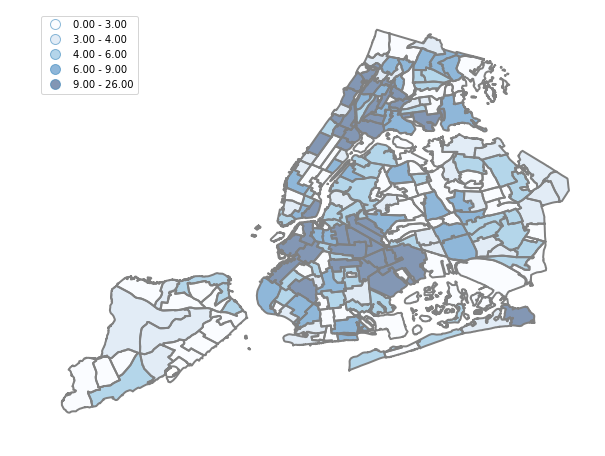

In [1017]:
ax = neighborhoods.plot(column='df_count', figsize = (10,20), edgecolor = 'grey', linewidth =2, cmap='Blues', legend=True, scheme='Quantiles')
ax.axis('off')
ax.legend(fontsize=16)

plt.savefig('school_2.pdf')

In [1018]:
school_Elementary = df[df['School Type'] == 'Elementary']
school_Elementary

,DBN,School Name,latitude,longitude,School Type,Enrollment,Rigorous Instruction Rating,Collaborative Teachers Rating,Supportive Environment Rating,Effective School Leadership Rating,...,Percent Asian,Percent Black,Percent Hispanic,Percent White,Years of principal experience at this school,Percent of teachers with 3 or more years of experience,Student Attendance Rate,Percent of Students Chronically Absent,Teacher Attendance Rate,geometry
0,01M015,P.S. 015 Roberto Clemente,40.721697,-73.978560,Elementary,162,Exceeding Target,Exceeding Target,Meeting Target,Exceeding Target,...,0.056,0.309,0.605,0.012,5.8,0.591,0.934,0.241,0.977,POINT (-73.97856 40.721697)
1,01M019,P.S. 019 Asher Levy,40.729928,-73.984393,Elementary,249,NaN,NaN,NaN,Exceeding Target,...,0.104,0.197,0.627,0.064,6.8,0.795,0.915,0.324,0.956,POINT (-73.984393 40.729928)
2,01M020,P.S. 020 Anna Silver,40.721260,-73.986336,Elementary,535,Meeting Target,Meeting Target,Meeting Target,Not Meeting Target,...,0.359,0.084,0.488,0.043,1.9,0.739,0.942,0.204,0.959,POINT (-73.98633599999999 40.72126)
4,01M063,The STAR Academy - P.S.63,40.724404,-73.986360,Elementary,188,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,...,0.048,0.191,0.644,0.106,8.9,0.524,0.938,0.168,0.984,POINT (-73.98636 40.724404)
5,01M064,P.S. 064 Robert Simon,40.724025,-73.981653,Elementary,238,Meeting Target,Exceeding Target,Meeting Target,Meeting Target,...,0.067,0.185,0.664,0.071,7.8,0.621,0.914,0.345,0.979,POINT (-73.98165299999999 40.724025)
6,01M110,P.S. 110 Florence Nightingale,40.715250,-73.979994,Elementary,365,Exceeding Target,Exceeding Target,Exceeding Target,Meeting Target,...,0.159,0.093,0.449,0.255,8.0,0.750,0.955,0.106,0.977,POINT (-73.979994 40.71525)
7,01M134,P.S. 134 Henrietta Szold,40.714301,-73.982966,Elementary,248,Meeting Target,Meeting Target,Meeting Target,Meeting Target,...,0.210,0.202,0.556,0.028,2.9,0.679,0.920,0.309,0.957,POINT (-73.982966 40.714301)
8,01M137,P.S. 137 John L. Bernstein,40.714406,-73.983291,Elementary,145,NaN,NaN,NaN,NaN,...,0.110,0.241,0.621,0.028,1.0,0.667,0.913,0.336,0.972,POINT (-73.98329099999999 40.714406)
10,01M142,P.S. 142 Amalia Castro,40.718248,-73.984344,Elementary,332,Meeting Target,Meeting Target,Meeting Target,Exceeding Target,...,0.066,0.123,0.789,0.009,1.0,0.697,0.927,0.265,0.973,POINT (-73.98434399999999 40.718248)
15,01M315,The East Village Community School,40.727726,-73.978382,Elementary,263,Meeting Target,Meeting Target,Exceeding Target,Meeting Target,...,0.095,0.095,0.221,0.532,1.9,0.583,0.954,0.091,0.966,POINT (-73.978382 40.727726)


In [1019]:
def make_point(row):
    return Point(row.longitude, row.latitude)
points = school_Elementary.apply(make_point, axis=1)
school_Elementary = gpd.GeoDataFrame(school_Elementary, geometry=points)
school_Elementary.crs = {'init': 'epsg:4326'}
school_Elementary.head()

,DBN,School Name,latitude,longitude,School Type,Enrollment,Rigorous Instruction Rating,Collaborative Teachers Rating,Supportive Environment Rating,Effective School Leadership Rating,...,Percent Asian,Percent Black,Percent Hispanic,Percent White,Years of principal experience at this school,Percent of teachers with 3 or more years of experience,Student Attendance Rate,Percent of Students Chronically Absent,Teacher Attendance Rate,geometry
0,01M015,P.S. 015 Roberto Clemente,40.721697,-73.978560,Elementary,162,Exceeding Target,Exceeding Target,Meeting Target,Exceeding Target,...,0.056,0.309,0.605,0.012,5.8,0.591,0.934,0.241,0.977,POINT (-73.97856 40.721697)
1,01M019,P.S. 019 Asher Levy,40.729928,-73.984393,Elementary,249,NaN,NaN,NaN,Exceeding Target,...,0.104,0.197,0.627,0.064,6.8,0.795,0.915,0.324,0.956,POINT (-73.984393 40.729928)
2,01M020,P.S. 020 Anna Silver,40.721260,-73.986336,Elementary,535,Meeting Target,Meeting Target,Meeting Target,Not Meeting Target,...,0.359,0.084,0.488,0.043,1.9,0.739,0.942,0.204,0.959,POINT (-73.98633599999999 40.72126)
4,01M063,The STAR Academy - P.S.63,40.724404,-73.986360,Elementary,188,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,...,0.048,0.191,0.644,0.106,8.9,0.524,0.938,0.168,0.984,POINT (-73.98636 40.724404)
5,01M064,P.S. 064 Robert Simon,40.724025,-73.981653,Elementary,238,Meeting Target,Exceeding Target,Meeting Target,Meeting Target,...,0.067,0.185,0.664,0.071,7.8,0.621,0.914,0.345,0.979,POINT (-73.98165299999999 40.724025)


In [1020]:
neighborhoods = gpd.read_file("nynta_14d/nynta.shp")
neighborhoods.head()

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Area,Shape_Leng,geometry
0,3,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,"POLYGON ((998870.8071899414 168503.1193847656,..."
1,3,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,"POLYGON ((1000351.30279541 194574.900390625, 9..."
2,2,Bronx,005,BX40,Fordham South,6.307284e+06,15878.272921,"POLYGON ((1014295.119384766 253236.9890136719,..."
3,3,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227722,"POLYGON ((990897.9002075195 169268.1207885742,..."
4,3,Brooklyn,047,BK96,Rugby-Remsen Village,3.270695e+07,30957.853395,"POLYGON ((1009623.354003906 176865.7595825195,..."


In [1021]:
school_Elementary.crs

{'init': 'epsg:4326'}

In [1022]:
neighborhoods.to_crs(df.crs, inplace=True)

In [1023]:
neighborhoods.crs

{'init': 'epsg:4326'}

In [1024]:
neighborhoods_Elementary = gpd.sjoin(school_Elementary, neighborhoods, how='left', op='within')
neighborhoods_Elementary.head()

,DBN,School Name,latitude,longitude,School Type,Enrollment,Rigorous Instruction Rating,Collaborative Teachers Rating,Supportive Environment Rating,Effective School Leadership Rating,...,Teacher Attendance Rate,geometry,index_right,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Area,Shape_Leng
0,01M015,P.S. 015 Roberto Clemente,40.721697,-73.978560,Elementary,162,Exceeding Target,Exceeding Target,Meeting Target,Exceeding Target,...,0.977,POINT (-73.97856 40.721697),71,1.0,Manhattan,061,MN28,Lower East Side,2.329762e+07,25469.235630
1,01M019,P.S. 019 Asher Levy,40.729928,-73.984393,Elementary,249,NaN,NaN,NaN,Exceeding Target,...,0.956,POINT (-73.984393 40.729928),52,1.0,Manhattan,061,MN22,East Village,1.089549e+07,13539.197632
2,01M020,P.S. 020 Anna Silver,40.721260,-73.986336,Elementary,535,Meeting Target,Meeting Target,Meeting Target,Not Meeting Target,...,0.959,POINT (-73.98633599999999 40.72126),53,1.0,Manhattan,061,MN27,Chinatown,1.450195e+07,20788.888972
4,01M063,The STAR Academy - P.S.63,40.724404,-73.986360,Elementary,188,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,...,0.984,POINT (-73.98636 40.724404),52,1.0,Manhattan,061,MN22,East Village,1.089549e+07,13539.197632
5,01M064,P.S. 064 Robert Simon,40.724025,-73.981653,Elementary,238,Meeting Target,Exceeding Target,Meeting Target,Meeting Target,...,0.979,POINT (-73.98165299999999 40.724025),71,1.0,Manhattan,061,MN28,Lower East Side,2.329762e+07,25469.235630


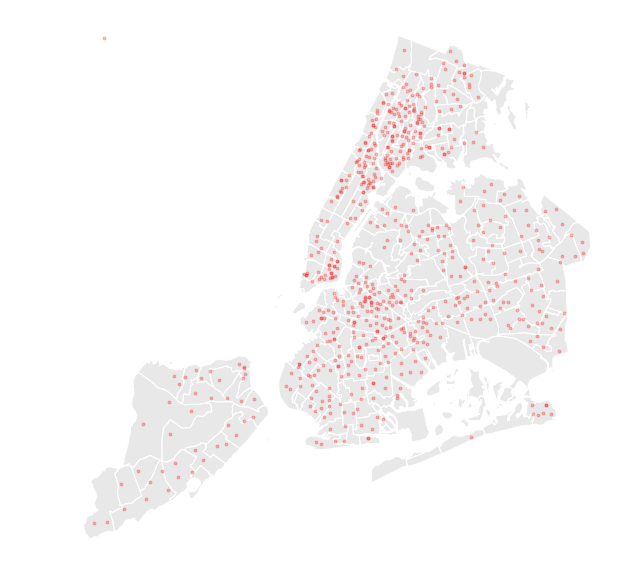

In [1025]:
ax = neighborhoods.to_crs({'proj': 'merc'}).plot(color='lightgrey', edgecolor='white', figsize=(10,15))
school_Elementary.to_crs({'proj': 'merc'}).plot(ax=ax, color='red', markersize=3, alpha=0.25)
ax.axis('off')
plt.savefig('Elementary_1.pdf')

In [1076]:
from geopandas import GeoDataFrame
neighborhoods_Elementary = GeoDataFrame(neighborhoods_Elementary)

In [1077]:
neighborhoods_Elementary.to_file("Elementary.json", driver='GeoJSON')

In [1026]:
neighborhoods.reset_index().head()

,index,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Area,Shape_Leng,geometry
0,0,3,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,POLYGON ((-73.94732672160579 40.62916656720946...
1,1,3,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,POLYGON ((-73.94193078816194 40.70072523469547...
2,2,2,Bronx,005,BX40,Fordham South,6.307284e+06,15878.272921,POLYGON ((-73.89138023380261 40.86170058826306...
3,3,3,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227722,POLYGON ((-73.97604935591414 40.63127590564665...
4,4,3,Brooklyn,047,BK96,Rugby-Remsen Village,3.270695e+07,30957.853395,POLYGON ((-73.90855790522767 40.65209593779451...


In [1027]:
neighborhoods_with_Elementary = gpd.sjoin(neighborhoods.reset_index(), school_Elementary, how='inner', op='intersects')
neighborhoods_with_Elementary.head()

,index,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Area,Shape_Leng,geometry,index_right,...,Percent HRA Eligible,Percent Asian,Percent Black,Percent Hispanic,Percent White,Years of principal experience at this school,Percent of teachers with 3 or more years of experience,Student Attendance Rate,Percent of Students Chronically Absent,Teacher Attendance Rate
0,0,3,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,POLYGON ((-73.94732672160579 40.62916656720946...,731,...,0.463,0.097,0.111,0.168,0.601,11.0,0.740,0.945,0.134,0.960
0,0,3,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,POLYGON ((-73.94732672160579 40.62916656720946...,728,...,0.401,0.172,0.470,0.139,0.177,2.9,0.833,0.948,0.149,0.964
0,0,3,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,POLYGON ((-73.94732672160579 40.62916656720946...,704,...,0.576,0.209,0.047,0.260,0.482,8.8,0.688,0.940,0.200,0.962
1,1,3,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,POLYGON ((-73.94193078816194 40.70072523469547...,457,...,0.749,0.018,0.695,0.269,0.015,10.0,0.958,0.874,0.524,0.958
1,1,3,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,POLYGON ((-73.94193078816194 40.70072523469547...,475,...,0.760,0.012,0.484,0.465,0.027,3.8,0.893,0.890,0.450,0.971


In [1028]:
neighborhoods['Elementary_count'] = neighborhoods_with_Elementary.groupby('index').size()
neighborhoods.head()

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Area,Shape_Leng,geometry,Elementary_count
0,3,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,POLYGON ((-73.94732672160579 40.62916656720946...,3.0
1,3,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,POLYGON ((-73.94193078816194 40.70072523469547...,8.0
2,2,Bronx,005,BX40,Fordham South,6.307284e+06,15878.272921,POLYGON ((-73.89138023380261 40.86170058826306...,5.0
3,3,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227722,POLYGON ((-73.97604935591414 40.63127590564665...,5.0
4,3,Brooklyn,047,BK96,Rugby-Remsen Village,3.270695e+07,30957.853395,POLYGON ((-73.90855790522767 40.65209593779451...,7.0


In [1029]:
neighborhoods['Elementary_count'] = neighborhoods['Elementary_count'].fillna(0)
neighborhoods.head()

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Area,Shape_Leng,geometry,Elementary_count
0,3,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,POLYGON ((-73.94732672160579 40.62916656720946...,3.0
1,3,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,POLYGON ((-73.94193078816194 40.70072523469547...,8.0
2,2,Bronx,005,BX40,Fordham South,6.307284e+06,15878.272921,POLYGON ((-73.89138023380261 40.86170058826306...,5.0
3,3,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227722,POLYGON ((-73.97604935591414 40.63127590564665...,5.0
4,3,Brooklyn,047,BK96,Rugby-Remsen Village,3.270695e+07,30957.853395,POLYGON ((-73.90855790522767 40.65209593779451...,7.0


In [1030]:
%%time
neighborhoods_with_Elementary = gpd.sjoin(neighborhoods.reset_index(), school_Elementary, how='inner', op='intersects')
neighborhoods['Elementary_count'] = neighborhoods_with_df.groupby('index').size()
neighborhoods['Elementary_count'] = neighborhoods['Elementary_count'].fillna(0)
neighborhoods.head()

CPU times: user 270 ms, sys: 5.04 ms, total: 275 ms
Wall time: 275 ms


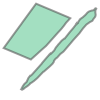

In [1031]:
nabe = neighborhoods.loc[135]
nabe.geometry

In [1032]:
neighborhoods.head().apply(lambda row: row.geometry, axis=1)

0    POLYGON ((-73.94732672160579 40.62916656720946...
1    POLYGON ((-73.94193078816194 40.70072523469547...
2    POLYGON ((-73.89138023380261 40.86170058826306...
3    POLYGON ((-73.97604935591414 40.63127590564665...
4    POLYGON ((-73.90855790522767 40.65209593779451...
dtype: object

In [1033]:
neighborhoods.apply(lambda row: school_Elementary.within(row.geometry).sum(), axis=1)

0      3
1      8
2      5
3      5
4      7
5      2
6      3
7      1
8      0
9      3
10     3
11     0
12     7
13     5
14     3
15     2
16     2
17     1
18     3
19     0
20     1
21     5
22     2
23     3
24     4
25     2
26     3
27     2
28     0
29     0
      ..
165    3
166    5
167    1
168    1
169    1
170    7
171    6
172    0
173    2
174    7
175    5
176    8
177    0
178    2
179    2
180    3
181    1
182    0
183    5
184    4
185    2
186    1
187    2
188    7
189    4
190    4
191    6
192    0
193    3
194    0
Length: 195, dtype: int64

In [1034]:
%%time
neighborhoods['Elementary_count'] = neighborhoods.apply(lambda row: school_Elementary.within(row.geometry).sum(), axis=1)

CPU times: user 9.5 s, sys: 85.8 ms, total: 9.59 s
Wall time: 10 s


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


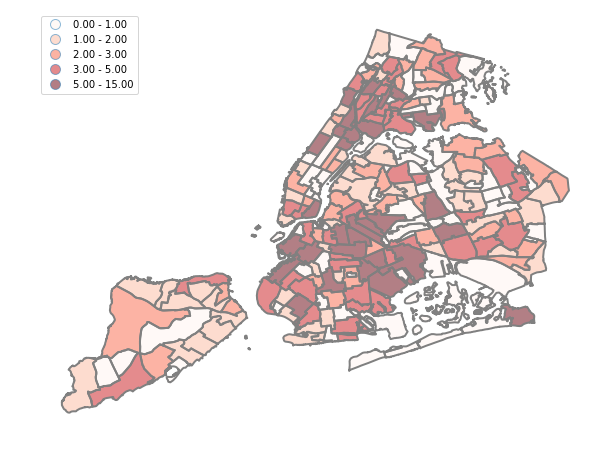

In [1035]:
ax = neighborhoods.plot(column='Elementary_count', figsize = (10,20), edgecolor = 'grey', linewidth =2, cmap='Reds', legend=True, scheme='Quantiles')
ax.axis('off')
ax.legend(fontsize=16)

plt.savefig('Elementary_2.pdf')

In [1036]:
school_Middle = df[df['School Type'] == 'Middle']
school_Middle

,DBN,School Name,latitude,longitude,School Type,Enrollment,Rigorous Instruction Rating,Collaborative Teachers Rating,Supportive Environment Rating,Effective School Leadership Rating,...,Percent Asian,Percent Black,Percent Hispanic,Percent White,Years of principal experience at this school,Percent of teachers with 3 or more years of experience,Student Attendance Rate,Percent of Students Chronically Absent,Teacher Attendance Rate,geometry
13,01M292,Henry Street School for International Studies,40.713446,-73.986033,Middle,25,NaN,NaN,NaN,NaN,...,0.040,0.360,0.440,0.160,0.9,0.591,0.874,0.560,0.972,POINT (-73.98603300000001 40.713446)
14,01M301,"Technology, Arts, and Sciences Studio",40.729885,-73.984346,Middle,156,Approaching Target,Meeting Target,Approaching Target,Meeting Target,...,0.077,0.288,0.551,0.045,10.3,0.647,0.916,0.289,0.959,POINT (-73.984346 40.729885)
16,01M332,University Neighborhood Middle School,40.713446,-73.986033,Middle,110,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,...,0.055,0.273,0.627,0.036,7.8,0.909,0.916,0.271,0.968,POINT (-73.98603300000001 40.713446)
17,01M345,"Collaborative Academy of Science, Technology, ...",40.713446,-73.986033,Middle,105,NaN,NaN,NaN,NaN,...,0.133,0.305,0.524,0.038,0.9,0.692,0.909,0.339,0.941,POINT (-73.98603300000001 40.713446)
21,01M378,School for Global Leaders,40.720185,-73.985957,Middle,264,Exceeding Target,Meeting Target,Meeting Target,Meeting Target,...,0.152,0.227,0.580,0.019,8.0,0.462,0.910,0.328,0.966,POINT (-73.985957 40.720185)
22,01M450,East Side Community School,40.729382,-73.982502,Middle,291,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,...,0.089,0.199,0.502,0.168,14.8,0.820,0.973,0.038,0.975,POINT (-73.982502 40.729382)
24,01M839,Tompkins Square Middle School,40.723846,-73.981763,Middle,371,Exceeding Target,Exceeding Target,Meeting Target,Meeting Target,...,0.232,0.159,0.372,0.202,7.9,0.655,0.956,0.099,0.960,POINT (-73.981763 40.723846)
38,02M104,J.H.S. 104 Simon Baruch,40.735820,-73.980983,Middle,1113,Exceeding Target,Exceeding Target,Meeting Target,Meeting Target,...,0.396,0.081,0.210,0.282,1.8,0.765,0.961,0.100,0.970,POINT (-73.98098299999999 40.73582)
40,02M114,East Side Middle School,40.780646,-73.947544,Middle,441,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,...,0.152,0.029,0.091,0.655,13.2,0.867,0.973,0.025,0.963,POINT (-73.94754399999999 40.780646)
45,02M131,M.S. 131,40.716510,-73.993700,Middle,420,Meeting Target,Exceeding Target,Exceeding Target,Exceeding Target,...,0.771,0.083,0.140,0.005,9.0,0.833,0.971,0.095,0.951,POINT (-73.9937 40.71651)


In [1037]:
def make_point(row):
    return Point(row.longitude, row.latitude)
points = school_Middle.apply(make_point, axis=1)
school_Middle = gpd.GeoDataFrame(school_Middle, geometry=points)
school_Middle.crs = {'init': 'epsg:4326'}

In [1038]:
neighborhoods = gpd.read_file("nynta_14d/nynta.shp")

In [1039]:
neighborhoods.to_crs(school_Middle.crs, inplace=True)

In [1040]:
neighborhoods_Middle = gpd.sjoin(school_Middle, neighborhoods, how='left', op='within')
neighborhoods_Middle.head()

,DBN,School Name,latitude,longitude,School Type,Enrollment,Rigorous Instruction Rating,Collaborative Teachers Rating,Supportive Environment Rating,Effective School Leadership Rating,...,Teacher Attendance Rate,geometry,index_right,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Area,Shape_Leng
13,01M292,Henry Street School for International Studies,40.713446,-73.986033,Middle,25,NaN,NaN,NaN,NaN,...,0.972,POINT (-73.98603300000001 40.713446),71,1,Manhattan,061,MN28,Lower East Side,2.329762e+07,25469.235630
14,01M301,"Technology, Arts, and Sciences Studio",40.729885,-73.984346,Middle,156,Approaching Target,Meeting Target,Approaching Target,Meeting Target,...,0.959,POINT (-73.984346 40.729885),52,1,Manhattan,061,MN22,East Village,1.089549e+07,13539.197632
16,01M332,University Neighborhood Middle School,40.713446,-73.986033,Middle,110,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,...,0.968,POINT (-73.98603300000001 40.713446),71,1,Manhattan,061,MN28,Lower East Side,2.329762e+07,25469.235630
17,01M345,"Collaborative Academy of Science, Technology, ...",40.713446,-73.986033,Middle,105,NaN,NaN,NaN,NaN,...,0.941,POINT (-73.98603300000001 40.713446),71,1,Manhattan,061,MN28,Lower East Side,2.329762e+07,25469.235630
21,01M378,School for Global Leaders,40.720185,-73.985957,Middle,264,Exceeding Target,Meeting Target,Meeting Target,Meeting Target,...,0.966,POINT (-73.985957 40.720185),53,1,Manhattan,061,MN27,Chinatown,1.450195e+07,20788.888972


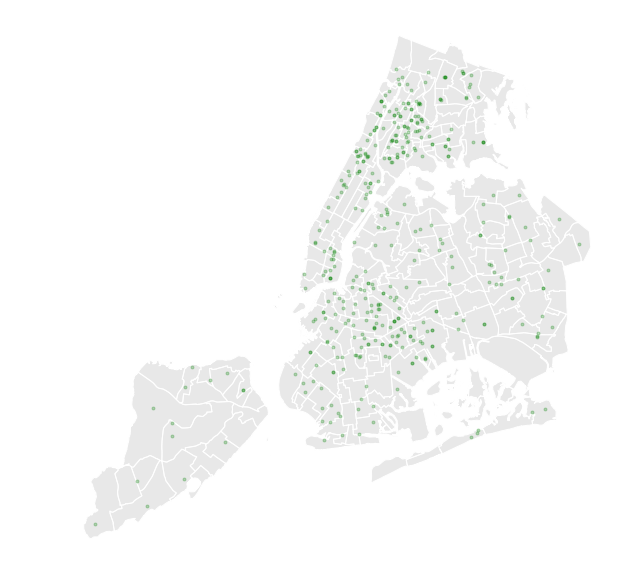

In [1041]:
ax = neighborhoods.to_crs({'proj': 'merc'}).plot(color='lightgrey', edgecolor='white', figsize=(10,15))
school_Middle.to_crs({'proj': 'merc'}).plot(ax=ax, color='green', markersize=3, alpha=0.25)
ax.axis('off')
plt.savefig('Middle_1.pdf')

In [1078]:
from geopandas import GeoDataFrame
neighborhoods_Middle = GeoDataFrame(neighborhoods_Middle)

In [1079]:
neighborhoods_Middle.to_file("Middle.json", driver='GeoJSON')

In [1042]:
neighborhoods.reset_index().head()

,index,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Area,Shape_Leng,geometry
0,0,3,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,POLYGON ((-73.94732672160579 40.62916656720946...
1,1,3,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,POLYGON ((-73.94193078816194 40.70072523469547...
2,2,2,Bronx,005,BX40,Fordham South,6.307284e+06,15878.272921,POLYGON ((-73.89138023380261 40.86170058826306...
3,3,3,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227722,POLYGON ((-73.97604935591414 40.63127590564665...
4,4,3,Brooklyn,047,BK96,Rugby-Remsen Village,3.270695e+07,30957.853395,POLYGON ((-73.90855790522767 40.65209593779451...


In [1043]:
neighborhoods_with_Middle = gpd.sjoin(neighborhoods.reset_index(), school_Middle, how='inner', op='intersects')
neighborhoods_with_Middle.head()

,index,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Area,Shape_Leng,geometry,index_right,...,Percent HRA Eligible,Percent Asian,Percent Black,Percent Hispanic,Percent White,Years of principal experience at this school,Percent of teachers with 3 or more years of experience,Student Attendance Rate,Percent of Students Chronically Absent,Teacher Attendance Rate
0,0,3,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,POLYGON ((-73.94732672160579 40.62916656720946...,740,...,0.477,0.185,0.626,0.116,0.065,2.0,0.895,0.949,0.140,0.969
0,0,3,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,POLYGON ((-73.94732672160579 40.62916656720946...,750,...,0.452,0.058,0.610,0.184,0.135,16.8,0.760,0.953,0.129,0.965
1,1,3,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,POLYGON ((-73.94193078816194 40.70072523469547...,463,...,0.708,0.146,0.656,0.135,0.042,12.0,0.800,0.911,0.327,0.965
1,1,3,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,POLYGON ((-73.94193078816194 40.70072523469547...,493,...,0.756,0.000,0.524,0.439,0.000,11.0,0.667,0.852,0.452,0.989
2,2,2,Bronx,005,BX40,Fordham South,6.307284e+06,15878.272921,POLYGON ((-73.89138023380261 40.86170058826306...,364,...,0.723,0.025,0.122,0.843,0.008,1.0,0.500,0.934,0.191,0.971


In [1044]:
neighborhoods['Middle_count'] = neighborhoods_with_Middle.groupby('index').size()

In [1045]:
neighborhoods['Middle_count'] = neighborhoods['Middle_count'].fillna(0)

In [1046]:
%%time
neighborhoods_with_Middle = gpd.sjoin(neighborhoods.reset_index(), school_Middle, how='inner', op='intersects')
neighborhoods['Middle_count'] = neighborhoods_with_Middle.groupby('index').size()
neighborhoods['Middle_count'] = neighborhoods['Middle_count'].fillna(0)
neighborhoods.head()

CPU times: user 249 ms, sys: 5.3 ms, total: 254 ms
Wall time: 254 ms


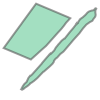

In [1047]:
nabe = neighborhoods.loc[135]
nabe.geometry

In [1048]:
neighborhoods.head().apply(lambda row: row.geometry, axis=1)
neighborhoods.apply(lambda row: school_Middle.within(row.geometry).sum(), axis=1)

0      2
1      2
2      4
3      2
4      4
5      0
6      1
7      1
8      2
9      4
10     2
11     1
12     7
13     4
14     1
15     1
16     4
17     0
18     0
19     0
20     2
21     3
22     1
23     1
24     3
25     2
26     0
27     3
28     0
29     0
      ..
165    4
166    3
167    3
168    0
169    1
170    2
171    3
172    0
173    0
174    7
175    5
176    5
177    0
178    2
179    0
180    4
181    4
182    0
183    5
184    2
185    3
186    1
187    1
188    5
189    1
190    1
191    3
192    0
193    2
194    0
Length: 195, dtype: int64

In [1049]:
%%time
neighborhoods['Middle_count'] = neighborhoods.apply(lambda row: school_Middle.within(row.geometry).sum(), axis=1)

CPU times: user 4.91 s, sys: 29.1 ms, total: 4.93 s
Wall time: 4.99 s


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


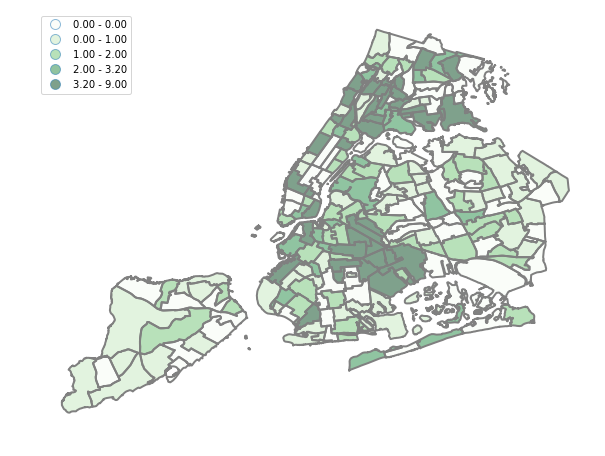

In [1050]:
ax = neighborhoods.plot(column='Middle_count', figsize = (10,20), edgecolor = 'grey', linewidth =2, cmap='Greens', legend=True, scheme='Quantiles')
ax.axis('off')
ax.legend(fontsize=16)

plt.savefig('Middle_2.pdf')

In [1051]:
school_K8 = df[df['School Type'] == 'K-8']
school_K8

,DBN,School Name,latitude,longitude,School Type,Enrollment,Rigorous Instruction Rating,Collaborative Teachers Rating,Supportive Environment Rating,Effective School Leadership Rating,...,Percent Asian,Percent Black,Percent Hispanic,Percent White,Years of principal experience at this school,Percent of teachers with 3 or more years of experience,Student Attendance Rate,Percent of Students Chronically Absent,Teacher Attendance Rate,geometry
3,01M034,P.S. 034 Franklin D. Roosevelt,40.726397,-73.975197,K-8,376,Approaching Target,Approaching Target,Approaching Target,Meeting Target,...,0.043,0.279,0.644,0.035,3.6,0.861,0.916,0.288,0.967,POINT (-73.97519699999999 40.726397)
9,01M140,P.S. 140 Nathan Straus,40.719114,-73.983602,K-8,363,Meeting Target,Meeting Target,Meeting Target,Meeting Target,...,0.052,0.124,0.777,0.036,1.0,0.781,0.929,0.287,0.969,POINT (-73.983602 40.719114)
11,01M184,P.S. 184m Shuang Wen,40.711346,-73.985682,K-8,627,NaN,NaN,NaN,Not Meeting Target,...,0.713,0.038,0.108,0.091,5.0,0.400,0.983,0.027,0.973,POINT (-73.985682 40.711346)
12,01M188,P.S. 188 The Island School,40.719870,-73.977376,K-8,458,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,...,0.015,0.299,0.646,0.035,1.9,0.805,0.903,0.381,0.966,POINT (-73.97737600000001 40.71987)
23,01M539,"New Explorations into Science, Technology and ...",40.719485,-73.979552,K-8,1098,Exceeding Target,Approaching Target,Meeting Target,Not Meeting Target,...,0.313,0.068,0.073,0.476,1.0,0.574,0.966,0.030,0.962,POINT (-73.979552 40.719485)
39,02M111,P.S. 111 Adolph S. Ochs,40.765788,-73.989530,K-8,356,Approaching Target,Meeting Target,Approaching Target,Meeting Target,...,0.177,0.163,0.506,0.115,1.0,0.833,0.933,0.236,0.963,POINT (-73.98953 40.765788)
43,02M126,P.S. 126 Jacob August Riis,40.710525,-73.996790,K-8,728,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,...,0.591,0.106,0.207,0.077,5.0,0.914,0.971,0.073,0.963,POINT (-73.99679 40.710525)
54,02M217,P.S./I.S. 217 Roosevelt Island,40.763914,-73.948472,K-8,551,Exceeding Target,Exceeding Target,Exceeding Target,Meeting Target,...,0.289,0.163,0.147,0.354,9.8,0.571,0.953,0.103,0.970,POINT (-73.948472 40.763914)
55,02M225,Ella Baker School,40.765555,-73.959631,K-8,281,Exceeding Target,Exceeding Target,Meeting Target,Meeting Target,...,0.018,0.221,0.423,0.278,13.9,0.696,0.929,0.259,0.958,POINT (-73.959631 40.765555)
60,02M276,Battery Park City School,40.706256,-74.017735,K-8,872,Exceeding Target,Meeting Target,Exceeding Target,Exceeding Target,...,0.205,0.041,0.111,0.563,7.0,0.738,0.957,0.083,0.968,POINT (-74.017735 40.706256)


In [1052]:
def make_point(row):
    return Point(row.longitude, row.latitude)
points = school_K8.apply(make_point, axis=1)
school_K8 = gpd.GeoDataFrame(school_K8, geometry=points)
school_K8.crs = {'init': 'epsg:4326'}

In [1053]:
neighborhoods = gpd.read_file("nynta_14d/nynta.shp")

In [1054]:
neighborhoods.to_crs(school_Middle.crs, inplace=True)

In [1055]:
neighborhoods_K8 = gpd.sjoin(school_K8, neighborhoods, how='left', op='within')
neighborhoods_K8.head()

,DBN,School Name,latitude,longitude,School Type,Enrollment,Rigorous Instruction Rating,Collaborative Teachers Rating,Supportive Environment Rating,Effective School Leadership Rating,...,Teacher Attendance Rate,geometry,index_right,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Area,Shape_Leng
3,01M034,P.S. 034 Franklin D. Roosevelt,40.726397,-73.975197,K-8,376,Approaching Target,Approaching Target,Approaching Target,Meeting Target,...,0.967,POINT (-73.97519699999999 40.726397),71,1,Manhattan,061,MN28,Lower East Side,23297615.8,25469.23563
9,01M140,P.S. 140 Nathan Straus,40.719114,-73.983602,K-8,363,Meeting Target,Meeting Target,Meeting Target,Meeting Target,...,0.969,POINT (-73.983602 40.719114),71,1,Manhattan,061,MN28,Lower East Side,23297615.8,25469.23563
11,01M184,P.S. 184m Shuang Wen,40.711346,-73.985682,K-8,627,NaN,NaN,NaN,Not Meeting Target,...,0.973,POINT (-73.985682 40.711346),71,1,Manhattan,061,MN28,Lower East Side,23297615.8,25469.23563
12,01M188,P.S. 188 The Island School,40.719870,-73.977376,K-8,458,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,...,0.966,POINT (-73.97737600000001 40.71987),71,1,Manhattan,061,MN28,Lower East Side,23297615.8,25469.23563
23,01M539,"New Explorations into Science, Technology and ...",40.719485,-73.979552,K-8,1098,Exceeding Target,Approaching Target,Meeting Target,Not Meeting Target,...,0.962,POINT (-73.979552 40.719485),71,1,Manhattan,061,MN28,Lower East Side,23297615.8,25469.23563


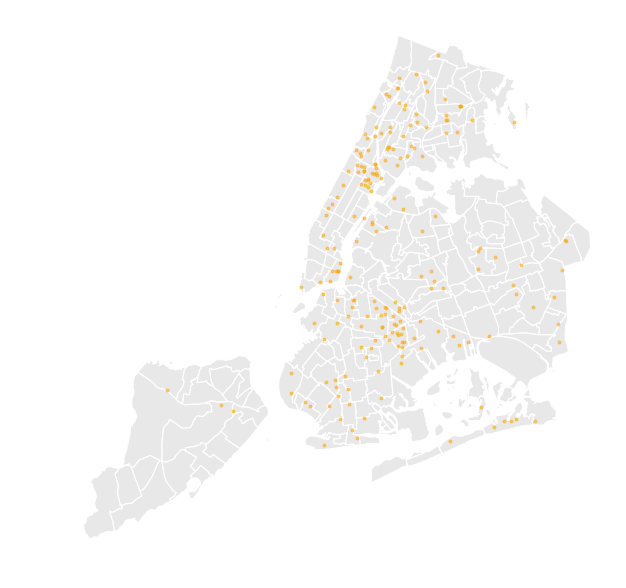

In [1056]:
ax = neighborhoods.to_crs({'proj': 'merc'}).plot(color='lightgrey', edgecolor='white', figsize=(10,15))
school_K8.to_crs({'proj': 'merc'}).plot(ax=ax, color='orange', markersize=3, alpha=0.5)
ax.axis('off')
plt.savefig('K8_1.pdf')

In [1080]:
from geopandas import GeoDataFrame
neighborhoods_K8 = GeoDataFrame(neighborhoods_K8)

In [1081]:
neighborhoods_K8.to_file("K8.json", driver='GeoJSON')

In [1057]:
neighborhoods.reset_index().head()

,index,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Area,Shape_Leng,geometry
0,0,3,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,POLYGON ((-73.94732672160579 40.62916656720946...
1,1,3,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,POLYGON ((-73.94193078816194 40.70072523469547...
2,2,2,Bronx,005,BX40,Fordham South,6.307284e+06,15878.272921,POLYGON ((-73.89138023380261 40.86170058826306...
3,3,3,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227722,POLYGON ((-73.97604935591414 40.63127590564665...
4,4,3,Brooklyn,047,BK96,Rugby-Remsen Village,3.270695e+07,30957.853395,POLYGON ((-73.90855790522767 40.65209593779451...


In [1058]:
neighborhoods_with_K8 = gpd.sjoin(neighborhoods.reset_index(), school_K8, how='inner', op='intersects')
neighborhoods_with_K8.head()

,index,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Area,Shape_Leng,geometry,index_right,...,Percent HRA Eligible,Percent Asian,Percent Black,Percent Hispanic,Percent White,Years of principal experience at this school,Percent of teachers with 3 or more years of experience,Student Attendance Rate,Percent of Students Chronically Absent,Teacher Attendance Rate
1,1,3,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,POLYGON ((-73.94193078816194 40.70072523469547...,487,...,0.694,0.004,0.163,0.816,0.013,1.5,0.818,0.935,0.225,0.956
1,1,3,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,POLYGON ((-73.94193078816194 40.70072523469547...,1116,...,0.512,0.010,0.865,0.090,0.010,NaN,NaN,0.952,0.143,NaN
1,1,3,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,POLYGON ((-73.94193078816194 40.70072523469547...,1128,...,0.618,0.014,0.385,0.569,0.019,NaN,NaN,NaN,NaN,NaN
2,2,2,Bronx,005,BX40,Fordham South,6.307284e+06,15878.272921,POLYGON ((-73.89138023380261 40.86170058826306...,351,...,0.711,0.007,0.161,0.814,0.007,4.8,0.857,0.945,0.171,0.960
3,3,3,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227722,POLYGON ((-73.97604935591414 40.63127590564665...,667,...,0.536,0.439,0.011,0.271,0.269,9.9,0.841,0.962,0.095,0.968


In [1059]:
neighborhoods['K8_count'] = neighborhoods_with_K8.groupby('index').size()

In [1060]:
neighborhoods['K8_count'] = neighborhoods['K8_count'].fillna(0)

In [1061]:
%%time
neighborhoods_with_K8 = gpd.sjoin(neighborhoods.reset_index(), school_K8, how='inner', op='intersects')
neighborhoods['K8_count'] = neighborhoods_with_K8.groupby('index').size()
neighborhoods['K8_count'] = neighborhoods['K8_count'].fillna(0)
neighborhoods.head()

CPU times: user 180 ms, sys: 3.48 ms, total: 183 ms
Wall time: 183 ms


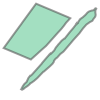

In [1062]:
nabe = neighborhoods.loc[135]
nabe.geometry

In [1063]:
neighborhoods.head().apply(lambda row: row.geometry, axis=1)
neighborhoods.apply(lambda row: school_K8.within(row.geometry).sum(), axis=1)

0       0
1       3
2       1
3       4
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      1
12     11
13      1
14      0
15      1
16      0
17      1
18      3
19      1
20      0
21      0
22      0
23      0
24      2
25      0
26      0
27      0
28      4
29      0
       ..
165     0
166     0
167     2
168     0
169     0
170     1
171     1
172     0
173     1
174     2
175     1
176     0
177     0
178     0
179     0
180     1
181     1
182     1
183     0
184     2
185     0
186     0
187     1
188     2
189     2
190     1
191     0
192     0
193     0
194     0
Length: 195, dtype: int64

In [1064]:
%%time
neighborhoods['K8_count'] = neighborhoods.apply(lambda row: school_K8.within(row.geometry).sum(), axis=1)

CPU times: user 2.88 s, sys: 19.1 ms, total: 2.9 s
Wall time: 2.93 s


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


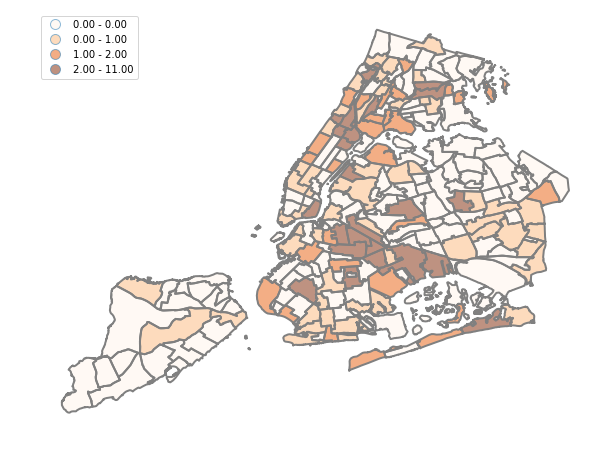

In [1065]:
ax = neighborhoods.plot(column='K8_count', figsize = (10,20), edgecolor = 'grey', linewidth =2, cmap='Oranges', legend=True, scheme='Quantiles')
ax.axis('off')
ax.legend(fontsize=16)

plt.savefig('K8_2.pdf')

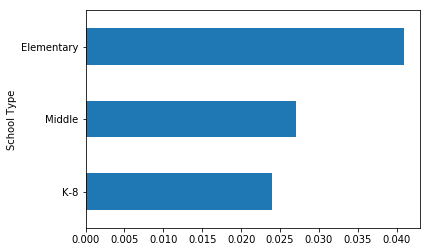

In [1083]:
Asian_in_school = df.groupby('School Type')['Percent Asian'].median()
Asian_in_school.sort_values().plot(kind='barh')
plt.savefig('Asian.pdf')

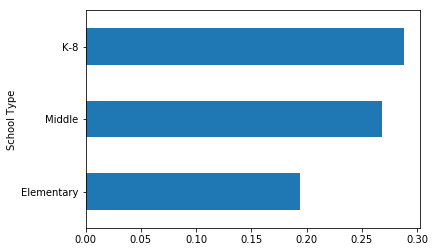

In [1084]:
Black_in_school = df.groupby('School Type')['Percent Black'].median()
Black_in_school.sort_values().plot(kind='barh')
plt.savefig('Black.pdf')

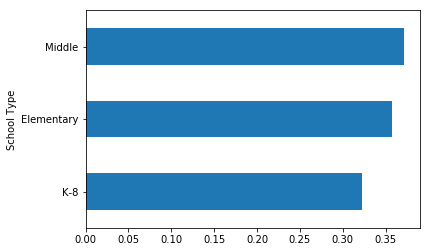

In [1085]:
Hispanic_in_school = df.groupby('School Type')['Percent Hispanic'].median()
Hispanic_in_school.sort_values().plot(kind='barh')
plt.savefig('Hispanic.pdf')

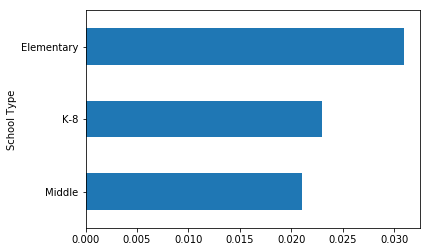

In [1086]:
White_in_school = df.groupby('School Type')['Percent White'].median()
White_in_school.sort_values().plot(kind='barh')
plt.savefig('White.pdf')

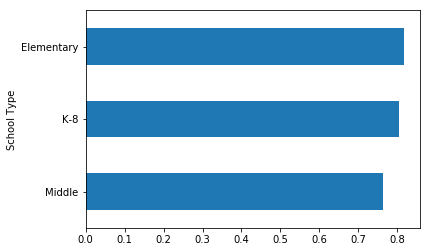

In [1070]:
teachers_experience = df.groupby('School Type')['Percent of teachers with 3 or more years of experience'].median()
teachers_experience.sort_values().plot(kind='barh')

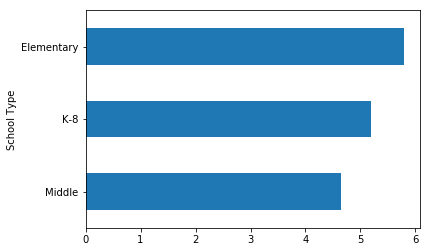

In [1071]:
principal_experience = df.groupby('School Type')['Years of principal experience at this school'].median()
principal_experience.sort_values().plot(kind='barh')